In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_excel(r"C:\Users\ankit\Python Project\Helth insurance project\premiums_young_with_gr.xlsx")

In [3]:
df.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [5]:
df.shape

(20096, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    20096 non-null  int64 
 1   Gender                 20096 non-null  object
 2   Region                 20096 non-null  object
 3   Marital_status         20096 non-null  object
 4   Number Of Dependants   20096 non-null  int64 
 5   BMI_Category           20096 non-null  object
 6   Smoking_Status         20094 non-null  object
 7   Employment_Status      20095 non-null  object
 8   Income_Level           20092 non-null  object
 9   Income_Lakhs           20096 non-null  int64 
 10  Medical History        20096 non-null  object
 11  Insurance_Plan         20096 non-null  object
 12  Annual_Premium_Amount  20096 non-null  int64 
 13  Genetical_Risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


In [7]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount,Genetical_Risk
count,20096.000000,20096.000000,20096.000000,20096.000000,20096.000000
mean,21.494029,0.718004,22.506519,8141.941033,2.503881
std,2.294050,0.940767,23.418644,2749.609551,1.710115
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,21.500000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [8]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [9]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [10]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

## Handling nulls and duplicates

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [15]:
df[df.number_of_dependants<0]["number_of_dependants"].value_counts()

number_of_dependants
-3    12
-1    10
Name: count, dtype: int64

In [16]:
df.number_of_dependants=np.abs(df.number_of_dependants)

In [17]:
df.number_of_dependants.describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

# Outlier Treatment

In [18]:
def bplot(data):

    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR

    
    sns.boxplot(data)
    plt.axhline(lower, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(upper, color='blue', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()

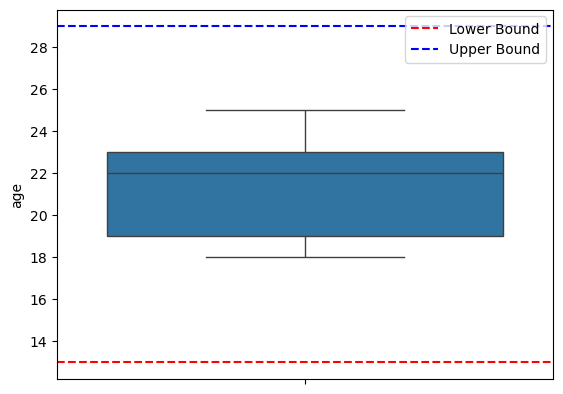

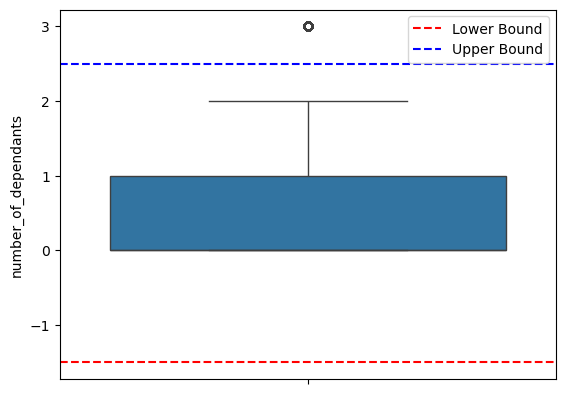

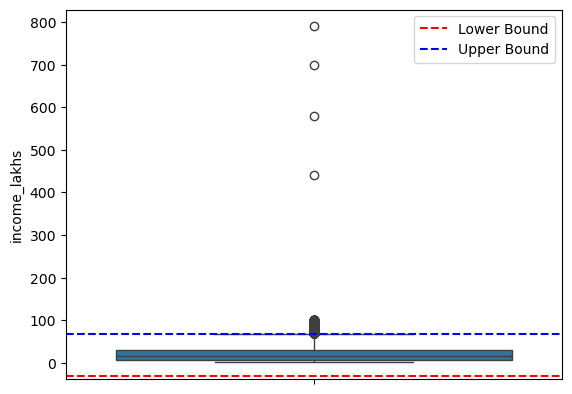

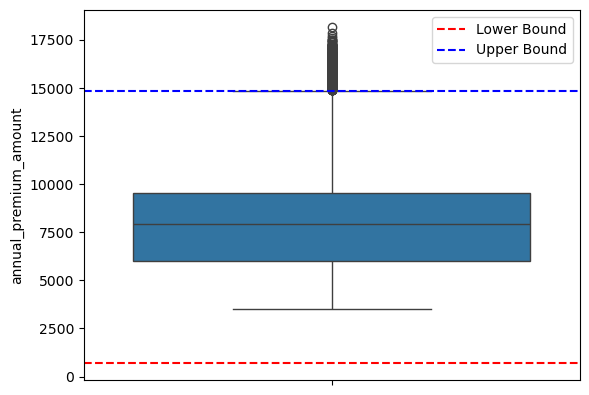

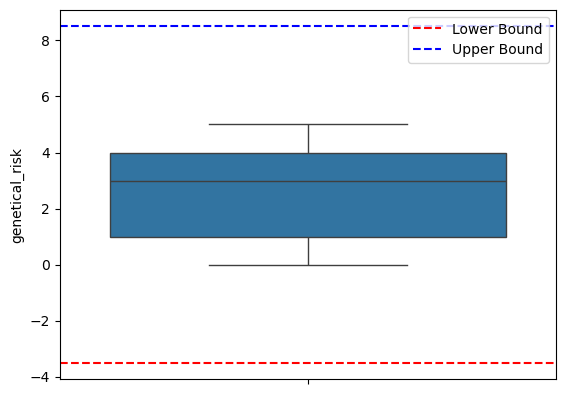

In [19]:
for c in df.select_dtypes([float,int]).columns:
    bplot(df[c])

In [20]:
df1=df[df.age<=100].copy()

# univariate analysis

<Axes: xlabel='income_lakhs', ylabel='Count'>

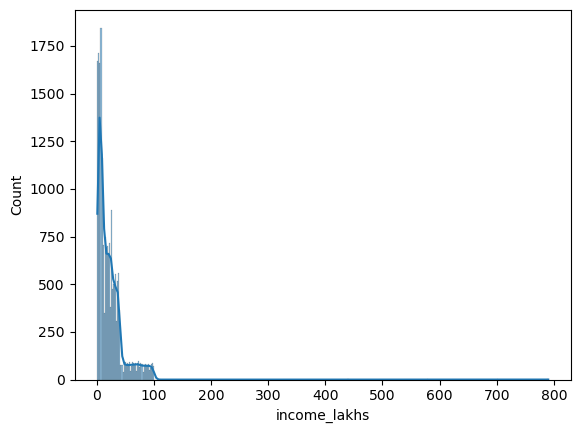

In [21]:
sns.histplot(df1.income_lakhs,kde=True)

In [22]:
def iqr_bounds(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return upper,lower

In [23]:
df2=df1[df1.income_lakhs<=df1.income_lakhs.quantile(0.999)].copy()

In [24]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


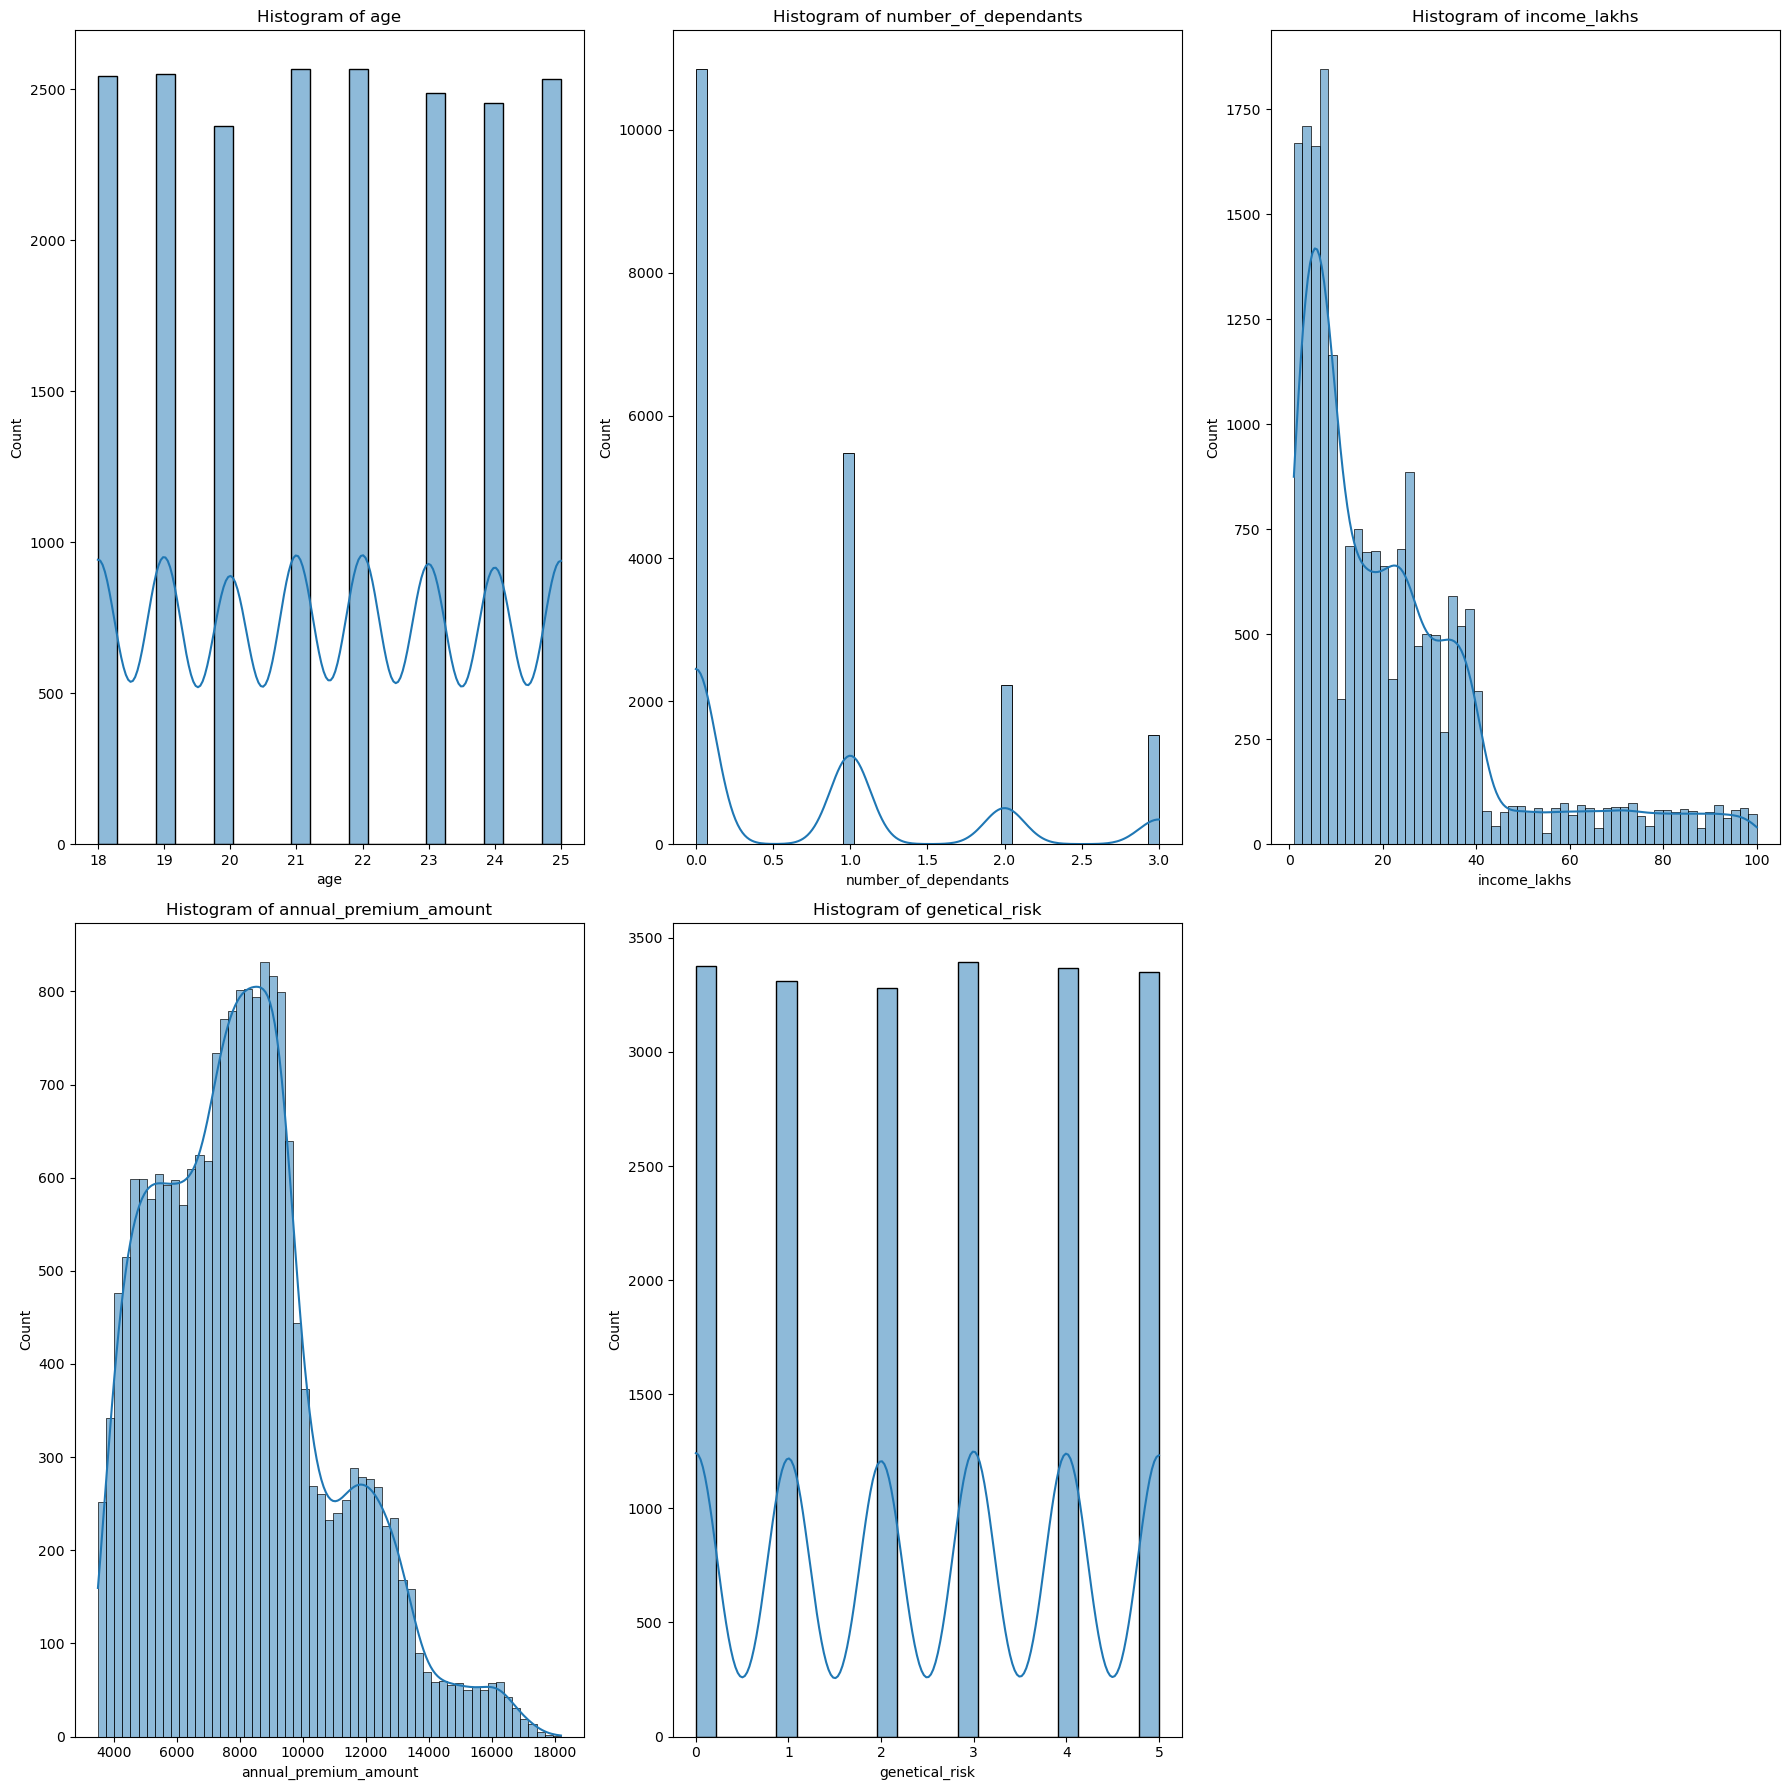

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 18))
axes = axes.flatten()

numeric_cols = df2.select_dtypes([float, int]).columns

for i, ax in enumerate(axes):
    if i == len(numeric_cols):
        ax.set_visible(False)
        continue  # skip plotting if no more columns

    col = numeric_cols[i]
    sns.histplot(df2[col], kde=True, ax=ax)
    ax.set_title(f"Histogram of {col}")  # Set title per subplot

plt.tight_layout()
plt.show()
    

# Bivariate analysis

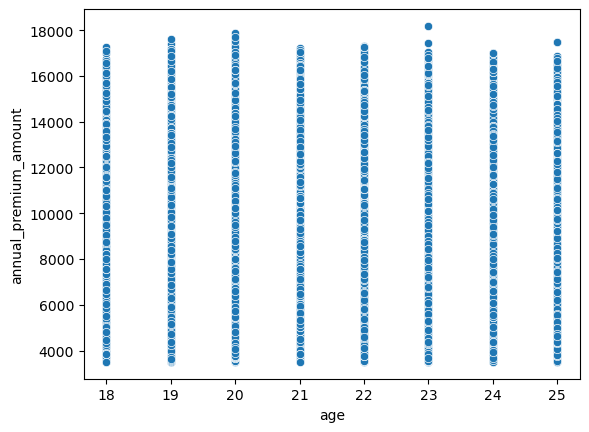

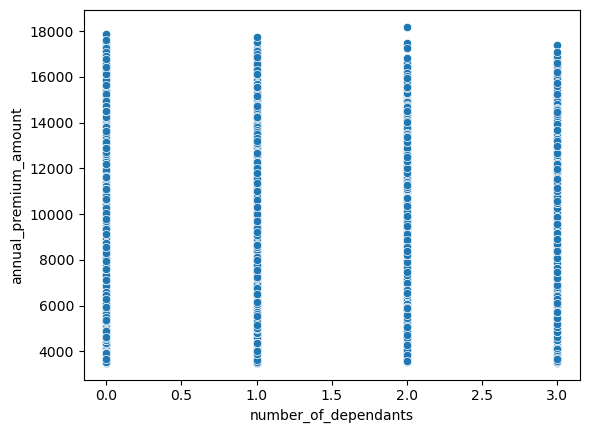

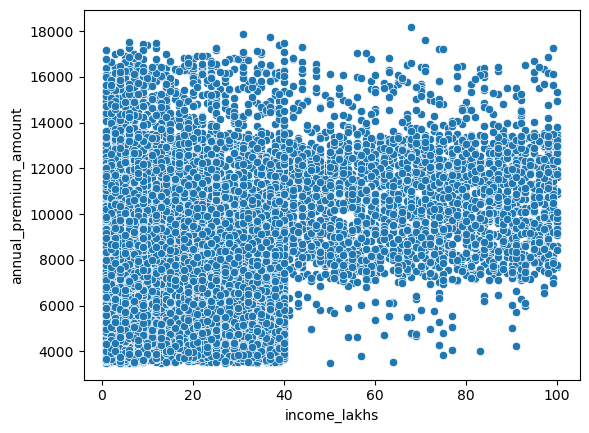

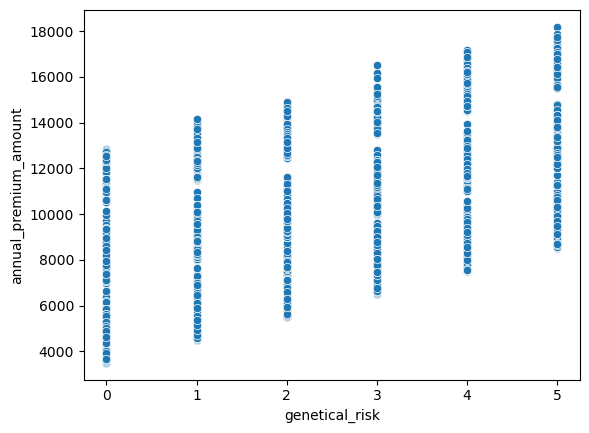

In [26]:
for col in df2.select_dtypes([float,int]).columns:
    if col=="annual_premium_amount":
        continue
    sns.scatterplot(x=df2[col],y=df2.annual_premium_amount)
    plt.show()

In [27]:
for col in df2.select_dtypes('object').columns:
    print(f"{col}:",df2[col].unique())
    

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


In [28]:
df2["smoking_status"]=df2["smoking_status"].replace({'Smoking=0':'No Smoking',
                                   'Does Not Smoke':'No Smoking',
                                   'Not Smoking':'No Smoking'}
                                   )
    

In [29]:
pct_count=df2["gender"].value_counts(normalize=True)

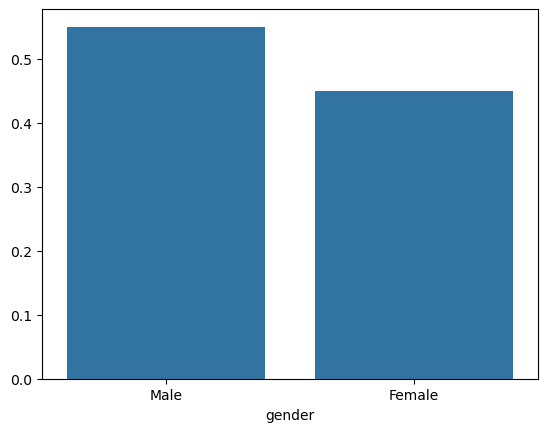

In [30]:
sns.barplot(x=pct_count.index,y=pct_count.values)
plt.show()

In [31]:
len(df2.select_dtypes('object').columns)

9

In [32]:
categorical_column=df2.select_dtypes(object).columns
categorical_column

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

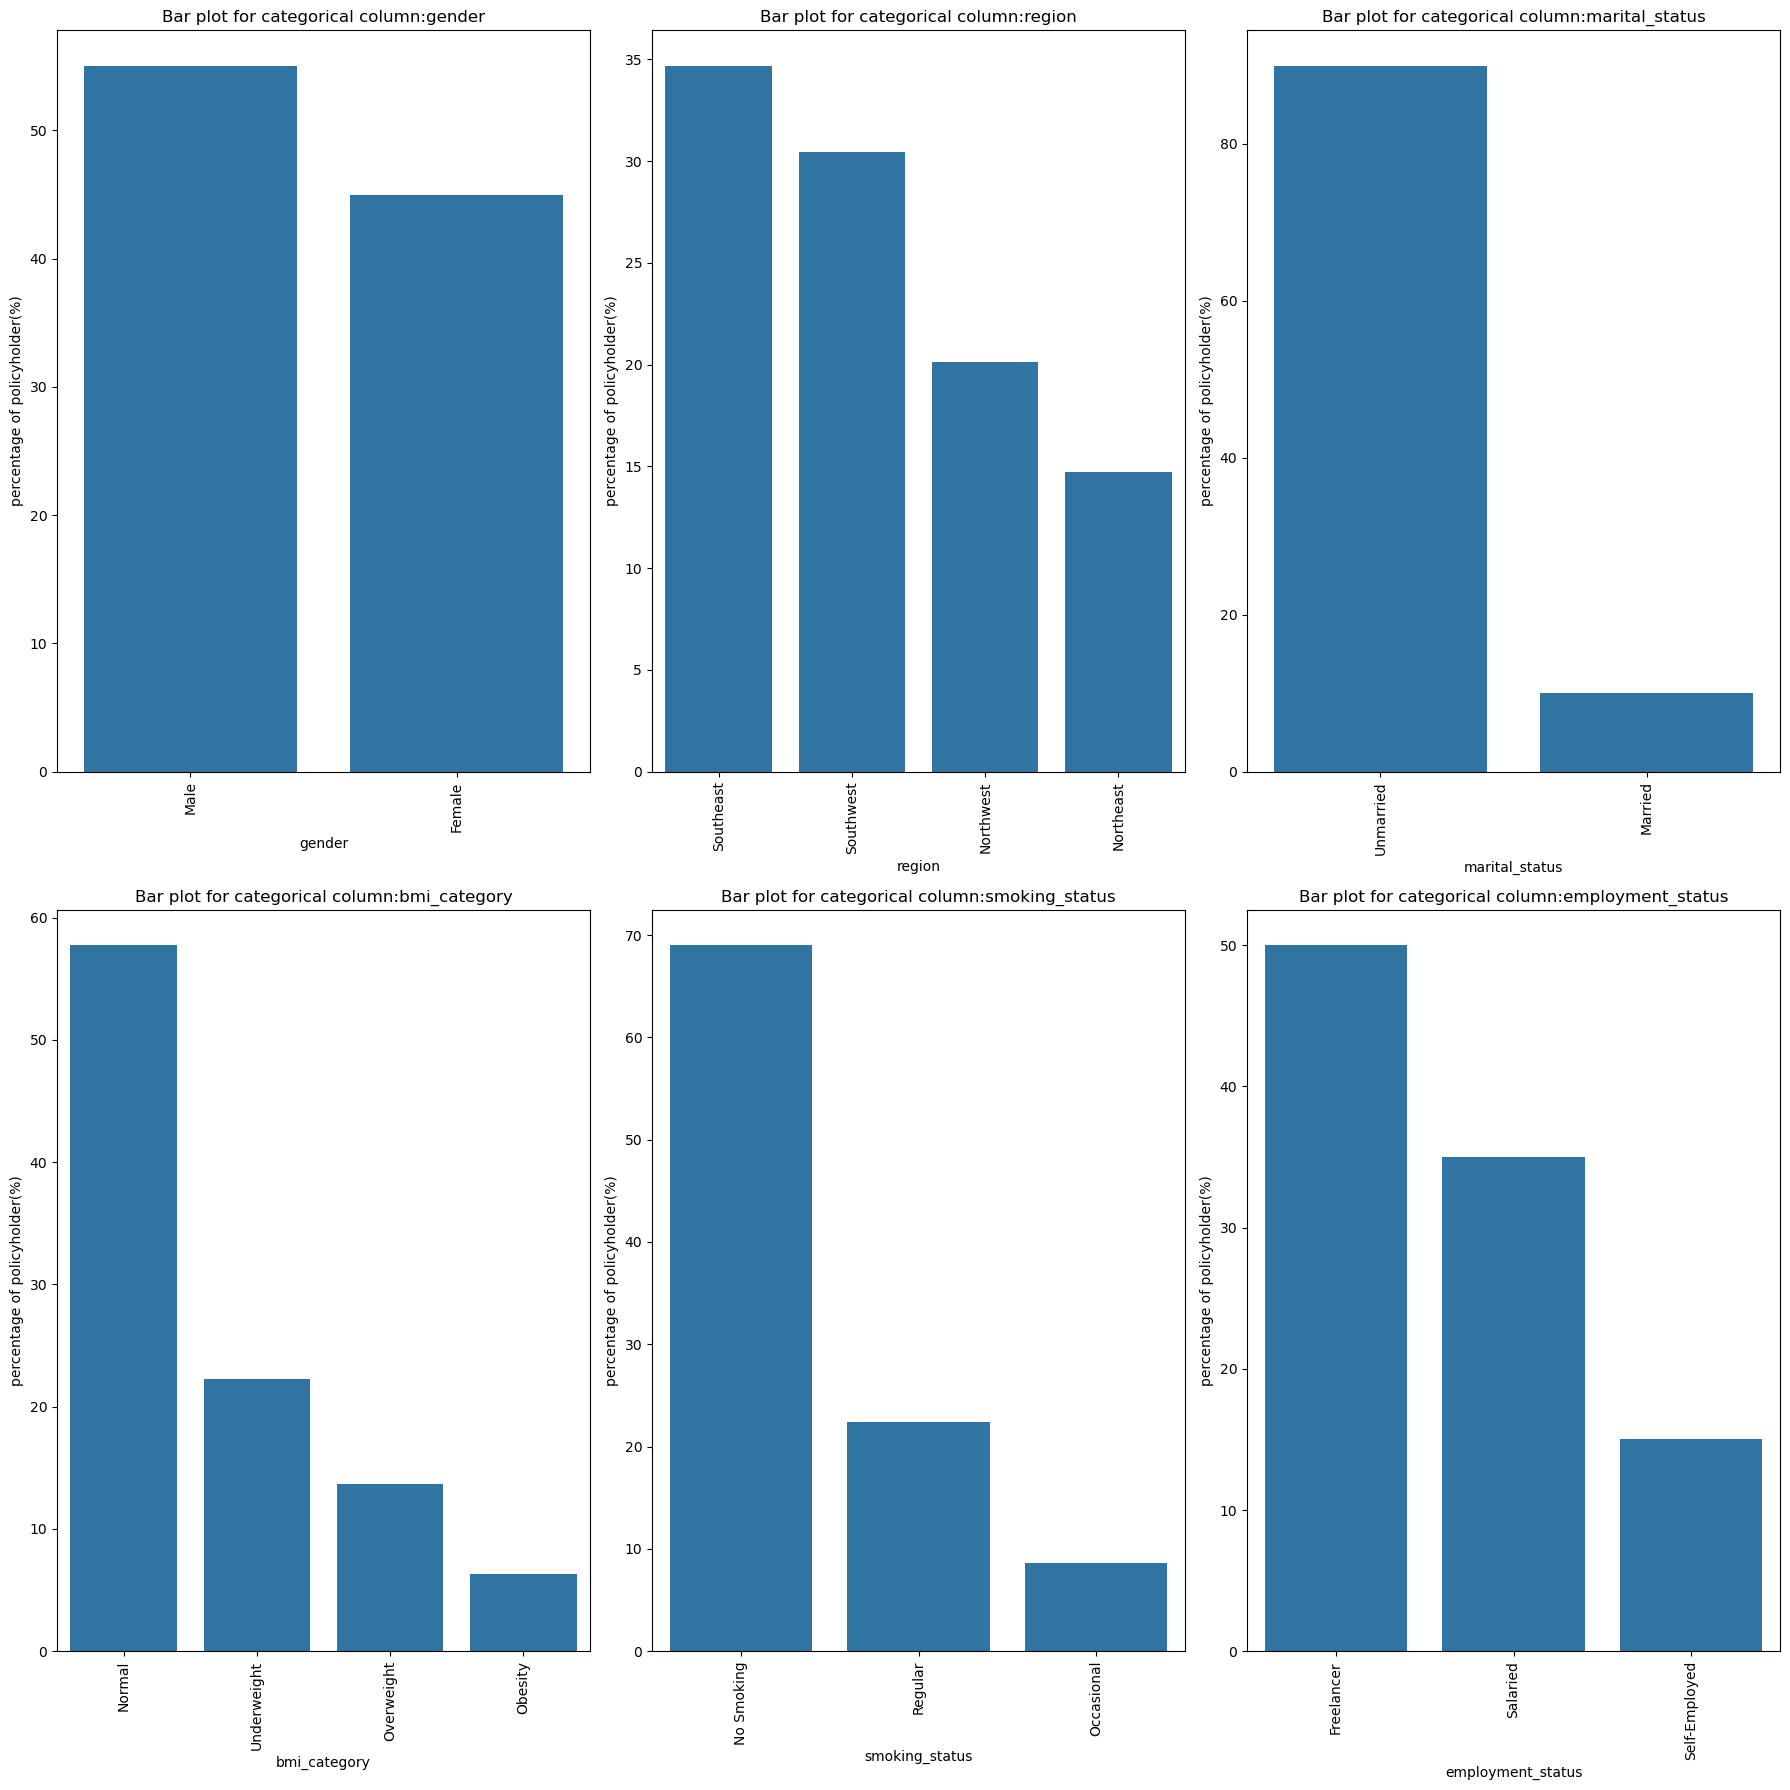

In [33]:
fig,axes=plt.subplots(2,3,figsize=(18,18))
axes=axes.flatten()

for ax,column in zip(axes,categorical_column):
    category_count=df2[column].value_counts(normalize=True)*100
    
    sns.barplot(x=category_count.index,y=category_count.values,ax=ax)
    ax.set_title(f"Bar plot for categorical column:{column}")
    ax.set_ylabel("percentage of policyholder(%)")
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=90)
    

plt.tight_layout()
plt.show()

In [34]:
crosstab=pd.crosstab(df2["income_level"],df2["insurance_plan"])

In [35]:
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


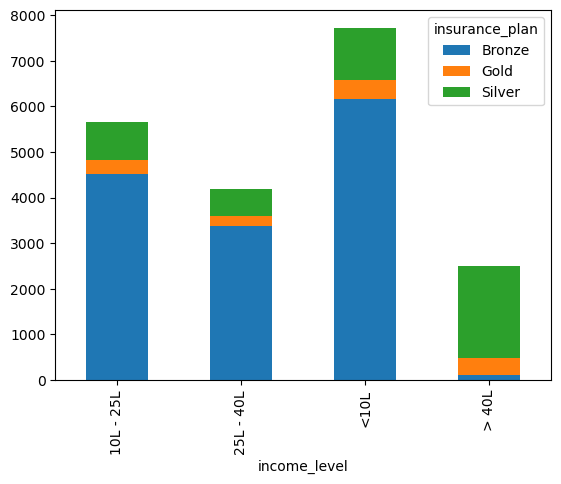

In [36]:
crosstab.plot(kind='bar',stacked=True)
plt.show()

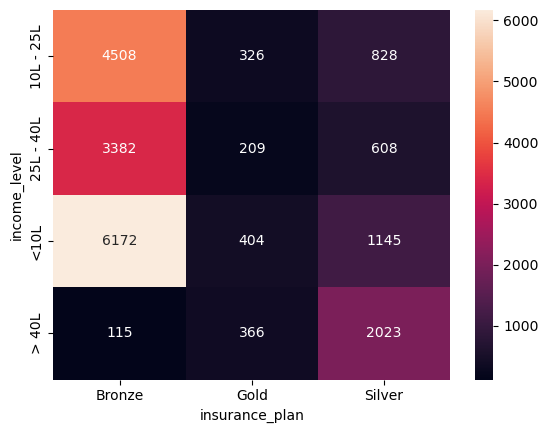

In [37]:
sns.heatmap(crosstab,annot=True,fmt='d')
plt.show()

In [38]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [39]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

# Feature Engineering

In [40]:
risk_score={
    'diabetes':6,
    'high blood pressure':6,
    'no disease':0,
    'thyroid':5,
    'heart disease':8,
    'none':0
}
df2[["disease1","disease2"]]=df2.medical_history.str.split("&",expand=True).apply(lambda x:x.str.lower().str.strip().fillna('none'))

In [41]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
5290,21,Male,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,> 40L,83,No Disease,Silver,12528,5,no disease,none
3232,18,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,No Disease,Bronze,4555,1,no disease,none
7430,23,Male,Northwest,Unmarried,1,Normal,No Smoking,Freelancer,<10L,7,No Disease,Bronze,3786,0,no disease,none
18007,20,Male,Southwest,Unmarried,1,Overweight,No Smoking,Freelancer,10L - 25L,13,No Disease,Bronze,9252,5,no disease,none
17669,24,Male,Northeast,Unmarried,0,Normal,Regular,Freelancer,<10L,7,No Disease,Silver,9871,2,no disease,none


In [42]:
df2["total_risk_score"]=df2['disease1'].map(risk_score)+df2['disease2'].map(risk_score)
df2['normalised_risk_score']=(df2["total_risk_score"]-df2['total_risk_score'].min())/(df2["total_risk_score"].max()-df2["total_risk_score"].min())

In [43]:
df2.sample(5)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
10522,25,Male,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,25L - 40L,29,Thyroid,Bronze,5609,1,thyroid,none,5,0.357143
10440,20,Female,Northwest,Unmarried,1,Normal,No Smoking,Freelancer,10L - 25L,25,No Disease,Bronze,8381,4,no disease,none,0,0.000000
7493,20,Female,Southeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,5,No Disease,Bronze,4184,0,no disease,none,0,0.000000
4255,25,Male,Southeast,Unmarried,0,Normal,Regular,Salaried,10L - 25L,24,No Disease,Bronze,6405,2,no disease,none,0,0.000000
6417,19,Female,Southeast,Unmarried,2,Underweight,No Smoking,Freelancer,<10L,1,Diabetes,Bronze,9474,5,diabetes,none,6,0.428571


In [44]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [45]:
df2.insurance_plan=df.insurance_plan.map({'Bronze':1,'Silver':2,'Gold':3})

In [46]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
8830,20,Male,Southeast,Unmarried,1,Underweight,Regular,Freelancer,<10L,7,No Disease,1,9253,5,no disease,none,0,0.0
2509,25,Male,Northwest,Married,3,Normal,Regular,Freelancer,10L - 25L,23,No Disease,1,10083,5,no disease,none,0,0.0
1065,18,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,80,No Disease,2,7328,0,no disease,none,0,0.0
3561,22,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,10L - 25L,23,No Disease,1,8604,4,no disease,none,0,0.0
2016,23,Male,Southwest,Unmarried,1,Normal,Regular,Self-Employed,25L - 40L,33,No Disease,1,6699,2,no disease,none,0,0.0


In [47]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [48]:
df2.income_level=df2.income_level.map({'<10L':1, '10L - 25L':2, '> 40L':3, '25L - 40L':4})

In [49]:
nominal_col=['gender', 'region', 'marital_status','bmi_category', 'smoking_status','employment_status']

In [50]:
df3=pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)

In [51]:
df3.sample(2)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6270,22,1,2,12,No Disease,1,7210,3,no disease,none,...,0,0,1,0,0,0,0,0,1,0
7448,19,0,2,11,No Disease,3,14178,2,no disease,none,...,0,0,1,0,0,1,0,1,0,1


In [52]:
df4=df3.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)

In [53]:
df4.sample(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
1135,24,1,1,9,2,10666,3,0.0,0,0,1,0,1,0,0,0,0,0,1,0


<Axes: >

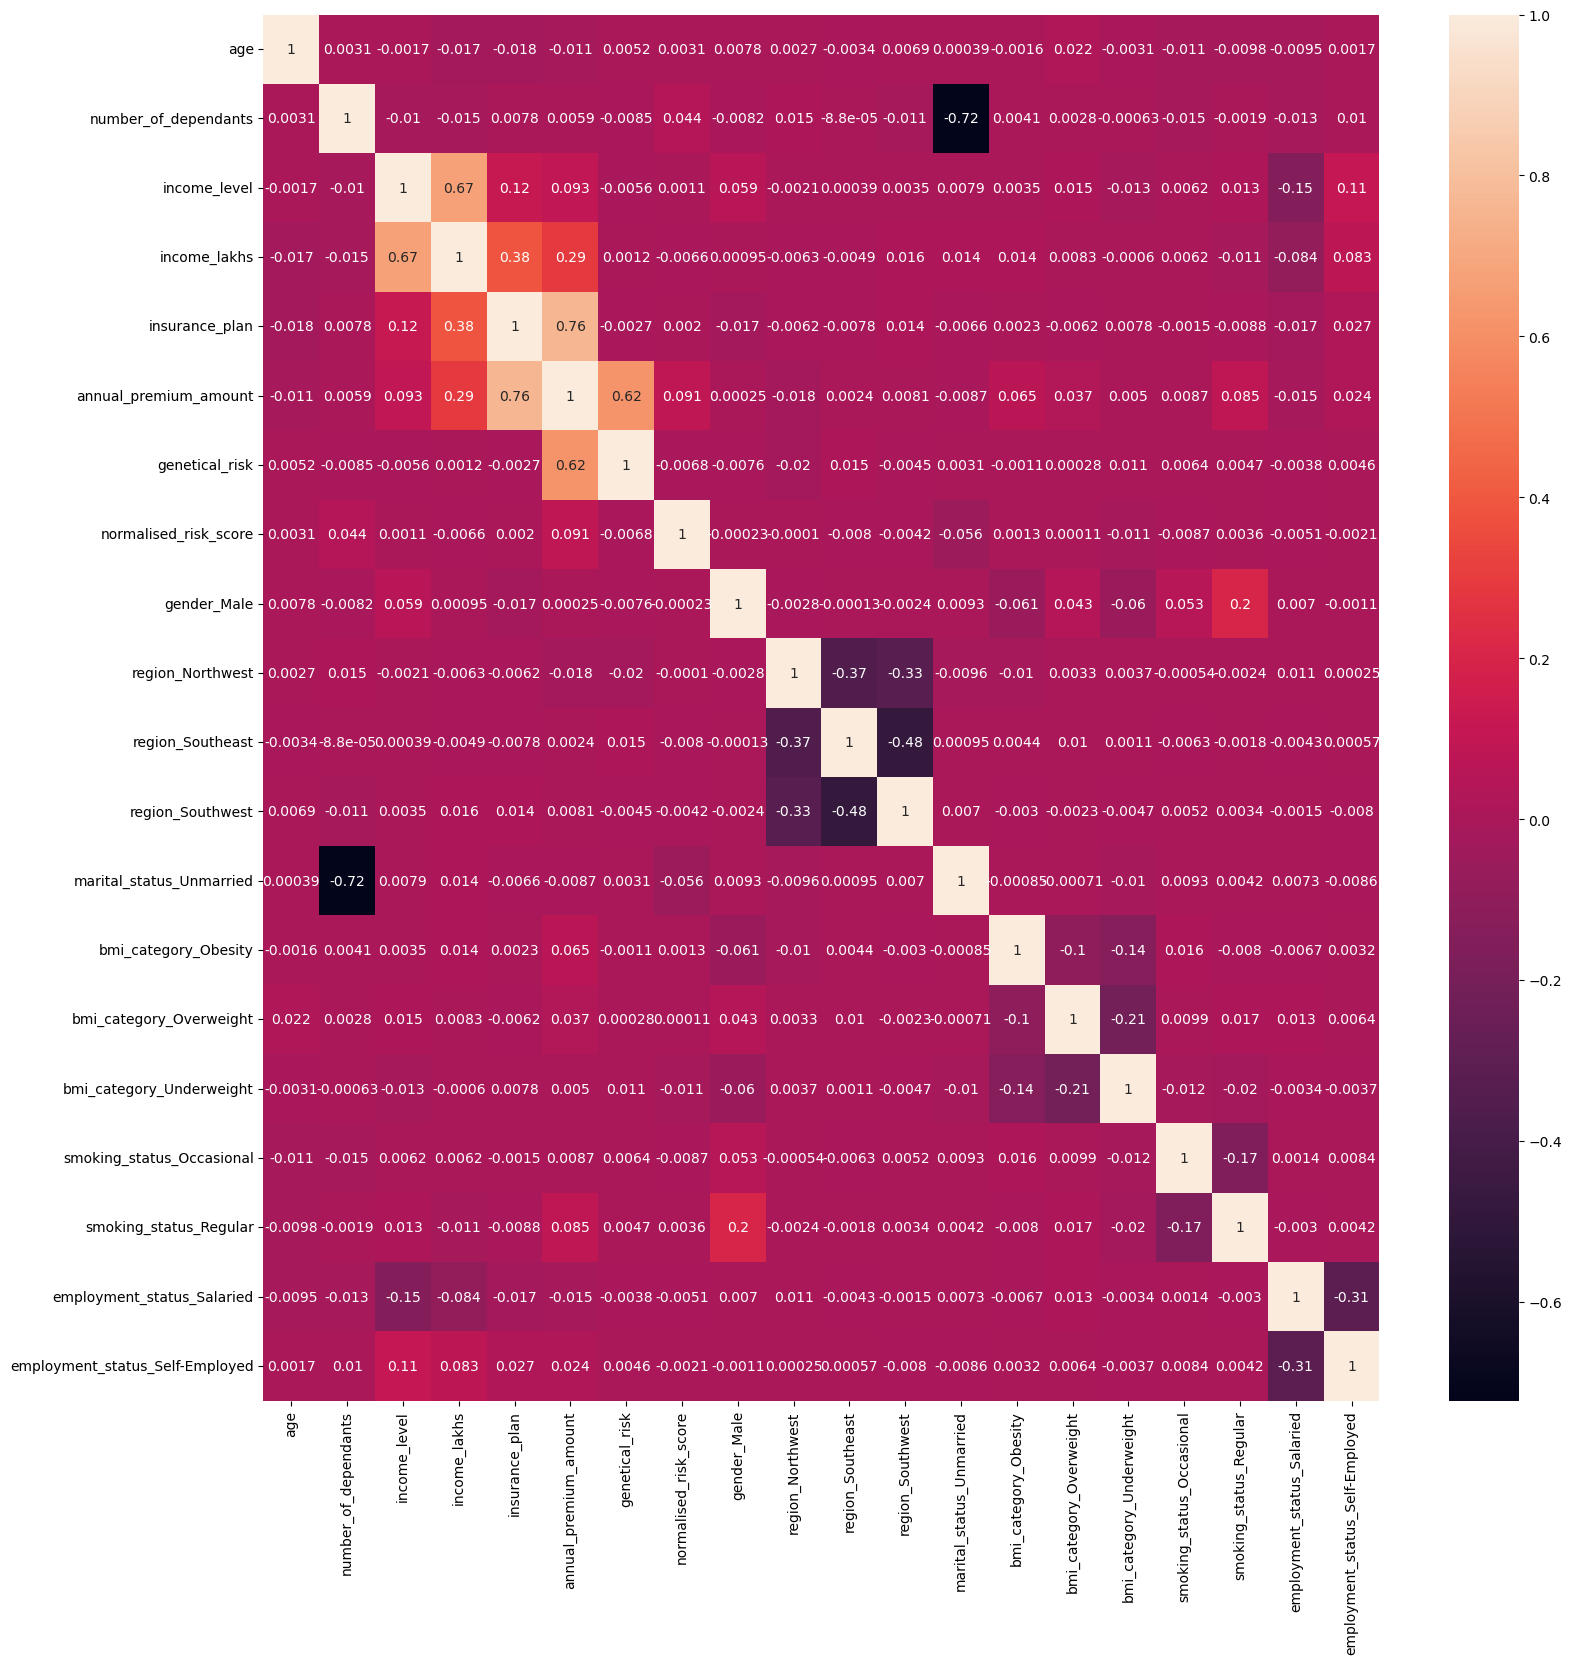

In [54]:
plt.figure(figsize=(18,18))

sns.heatmap(df4.corr(),annot=True)

In [55]:
X=df4.drop('annual_premium_amount',axis=1)
y=df4['annual_premium_amount']

In [56]:
X.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [57]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [58]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.666667,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.666667,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['column']=data.columns
    vif_df['Vif']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [60]:
calculate_vif(X)

,column,Vif
0,age,3.155837
1,number_of_dependants,1.936584
2,income_level,3.916214
3,income_lakhs,4.344741
4,insurance_plan,1.647600
5,genetical_risk,2.981440
6,normalised_risk_score,1.154735
7,gender_Male,2.318870
8,region_Northwest,2.155017
9,region_Southeast,2.991916


###### we will drop columns only if the vif is greater than 10 and columns are to be dropped one by one and then checked for vif however we are dropping vif to match lecture requirement
| VIF Value  | Interpretation                                | Action Needed?               |
| ---------- | --------------------------------------------- | ---------------------------- |
| **1**      | No multicollinearity                          | ✅ Ideal                      |
| **1 - 5**  | Moderate correlation                          | ✅ Usually okay               |
| **5 - 10** | High correlation (possible multicollinearity) | ⚠️ Investigate further       |
| **> 10**   | Severe multicollinearity                      | ❌ Remove or combine features |


In [61]:
calculate_vif(X.drop("income_level",axis=1))

,column,Vif
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalised_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [62]:
X_reduced=X.drop('income_level',axis=1)

# Model Training

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [64]:
print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

X_train:(14060, 18)
X_test:(6026, 18)
y_train:(14060,)
y_test:(6026,)


In [65]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)


train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score,test_score

(0.988297900194864, 0.9887263253056615)

In [66]:
model_lr.intercept_

3978.823528438261

In [67]:
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [68]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalised_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

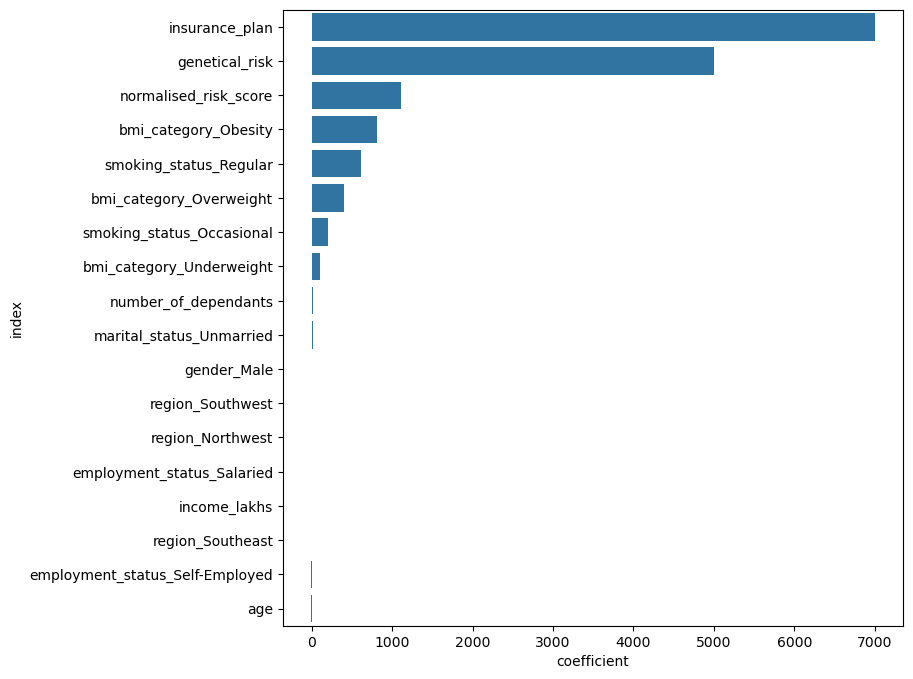

In [69]:
coef_df=pd.DataFrame(model_lr.coef_,X_test.columns,columns=["coefficient"]).reset_index()

coef_df=coef_df.sort_values(by='coefficient',ascending=False)
coef_df


plt.figure(figsize=(8,8))
sns.barplot(x=coef_df["coefficient"],y=coef_df["index"])
plt.show()

In [70]:
model_ridge=Ridge()

In [71]:
model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
train_score=model_ridge.score(X_train,y_train)
test_score=model_ridge.score(X_test,y_test)
train_score,test_score

(0.9882972960153418, 0.9887275909694276)

In [72]:
from xgboost import XGBRegressor

In [73]:
from xgboost import XGBRegressor
model_xg=XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred=model_xg.predict(X_test)
train_score=model_xg.score(X_train,y_train)
test_score=model_xg.score(X_test,y_test)
train_score,test_score

(0.9925054907798767, 0.987729549407959)

In [74]:
rsme=root_mean_squared_error(y_test,y_pred)

In [75]:
rsme

305.4712622520847

In [76]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

93312.69206188193
305.4712622520847


In [77]:
model_xgb=XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
    

In [78]:
random_search.fit(X_train,y_train)
random_search.best_score_

0.9884662826855978

In [79]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2}

In [80]:
best_model=model_lr

In [81]:
best_model

LinearRegression()

# Error Analysis

In [82]:
res=pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred,
    
})

In [83]:
res['residuals']=res['y_pred']-res['y_test']
res['residual%']=res['residuals']*100/res['y_test']
res.head()

,y_test,y_pred,residuals,residual%
12774,6238,6180.613281,-57.386719,-0.919954
14758,9462,9693.355469,231.355469,2.445101
13205,5152,5670.647949,518.647949,10.066924
14278,6988,7553.853027,565.853027,8.097496
19351,4917,5138.655273,221.655273,4.507937


<Axes: xlabel='residual%', ylabel='Count'>

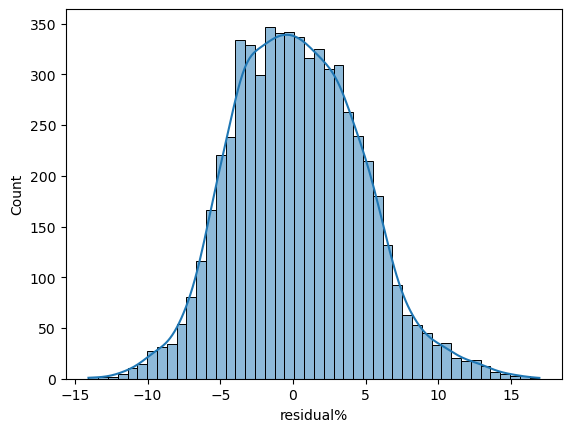

In [84]:
sns.histplot(res['residual%'],kde=True)

In [85]:
extreme_error=10
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [86]:
len(extreme_error_threshold)*100/len(res)

2.8377032857616995

In [87]:
extreme_error_threshold.sort_values(by='residual%',ascending=False)

,y_test,y_pred,residuals,residual%
12669,3985,4660.457031,675.457031,16.949988
14788,3549,4115.660156,566.660156,15.966756
10364,3784,4385.125488,601.125488,15.885980
17540,3951,4569.825195,618.825195,15.662495
1230,3647,4199.640137,552.640137,15.153280
...,...,...,...,...
12046,4980,4366.972656,-613.027344,-12.309786
14055,4466,3897.026367,-568.973633,-12.740117
6921,4601,4008.303223,-592.696777,-12.881912
5640,5361,4612.833984,-748.166016,-13.955718


In [88]:
extreme_error_threshold.index

Index([13205, 12669,  2918,  1601, 17084,  7181, 14290, 12285, 13476, 15481,
       ...
        8692, 11094, 15201,  1986, 15280,   404,  8008,  9714, 11971,  1534],
      dtype='int64', length=171)

In [89]:
extreme_error_df=X_test.loc[extreme_error_threshold.index]

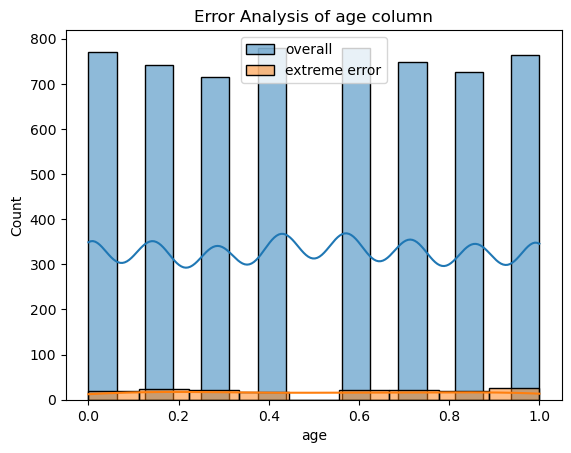

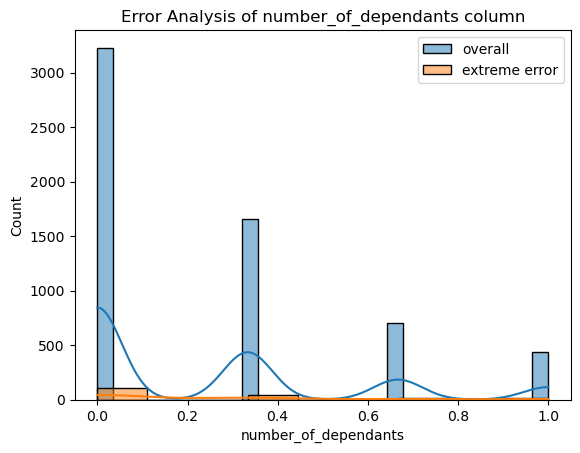

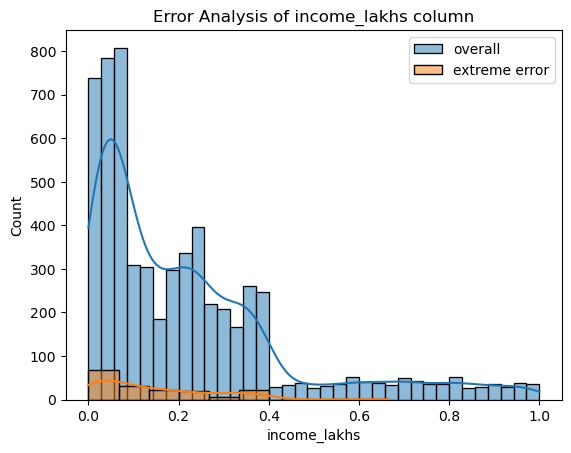

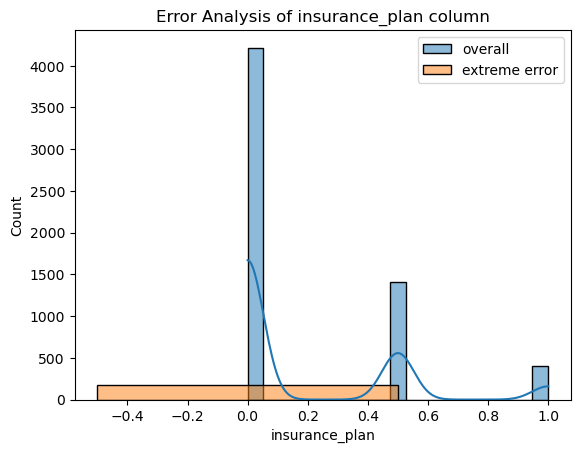

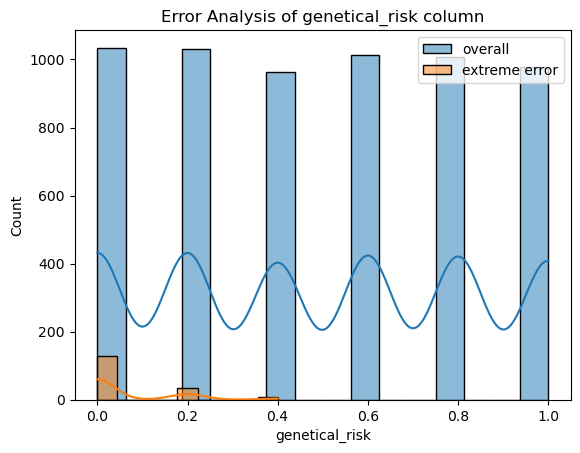

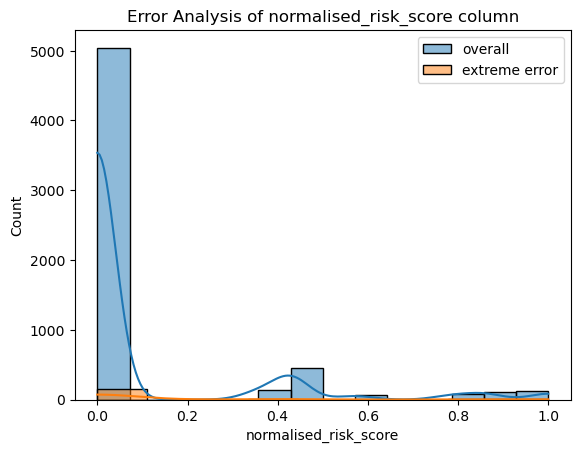

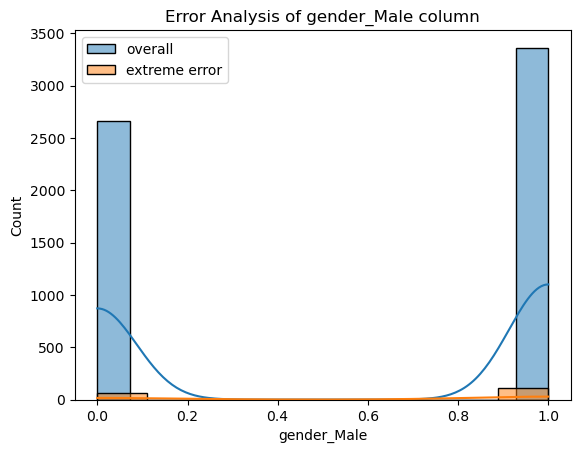

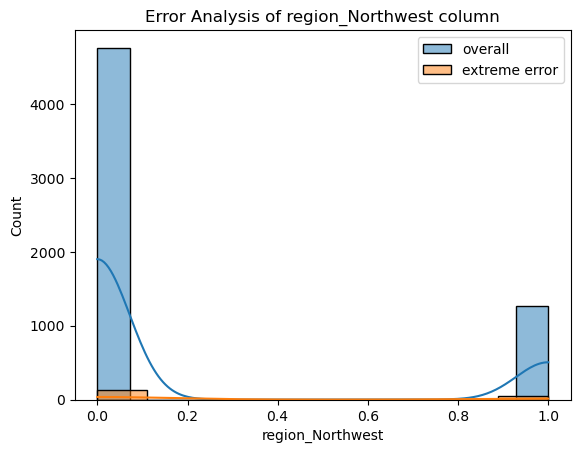

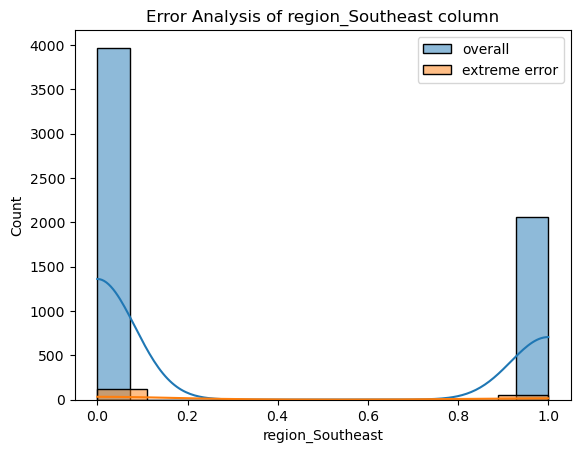

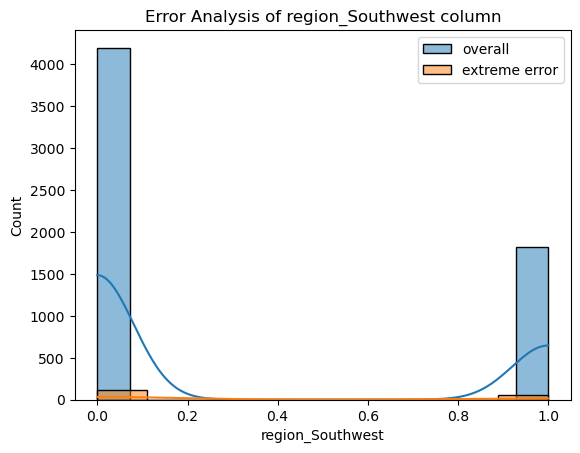

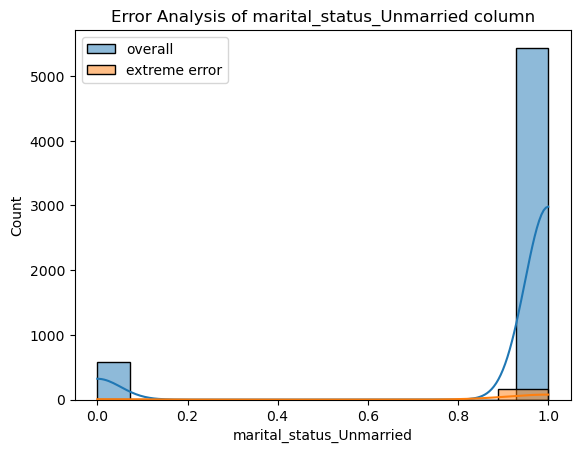

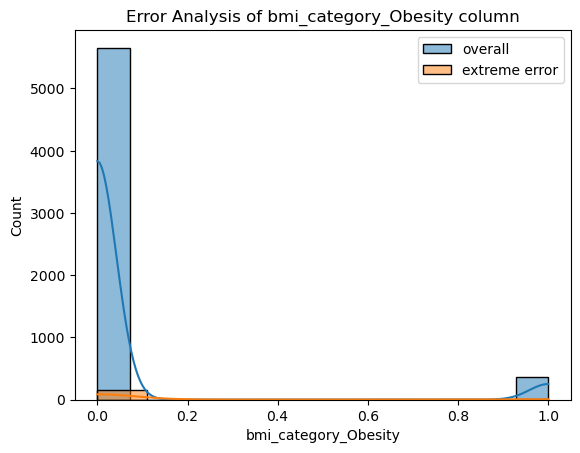

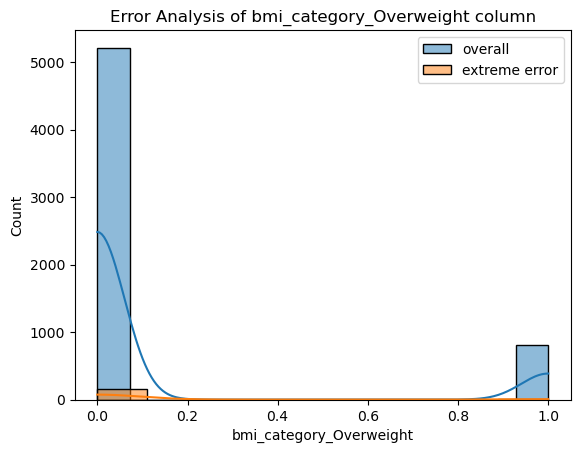

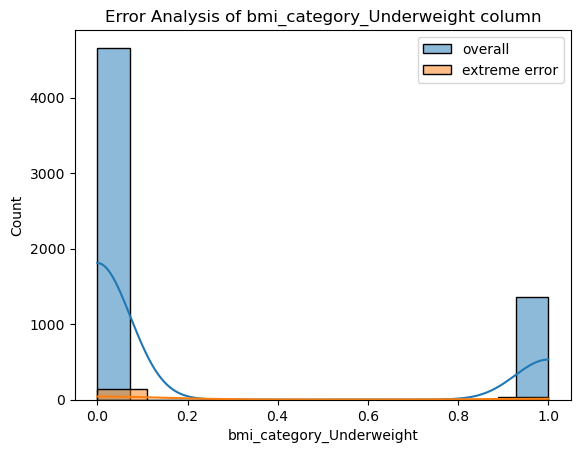

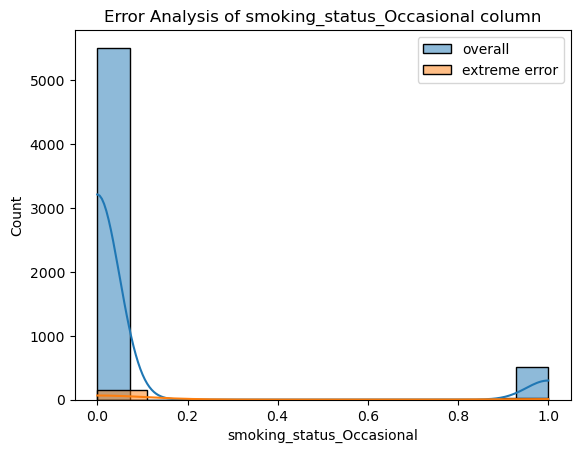

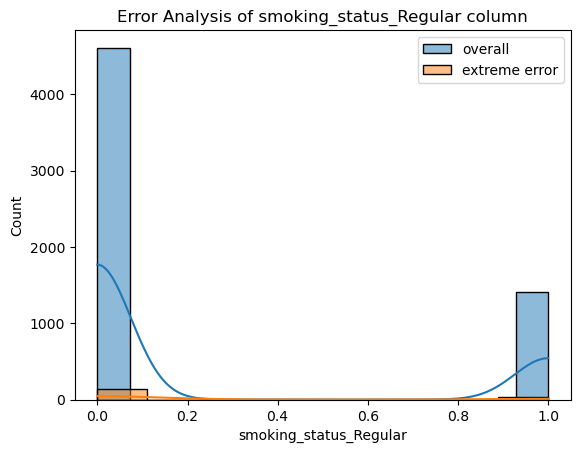

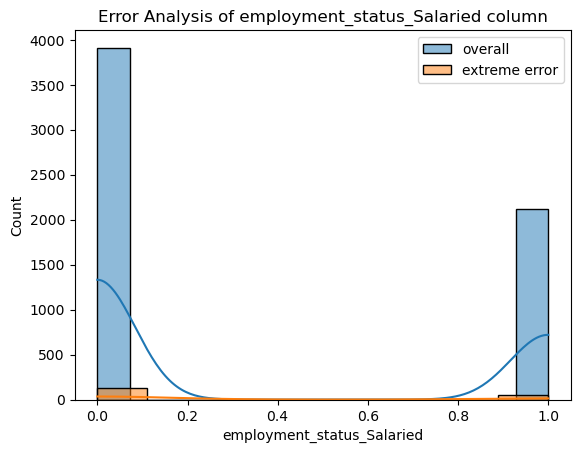

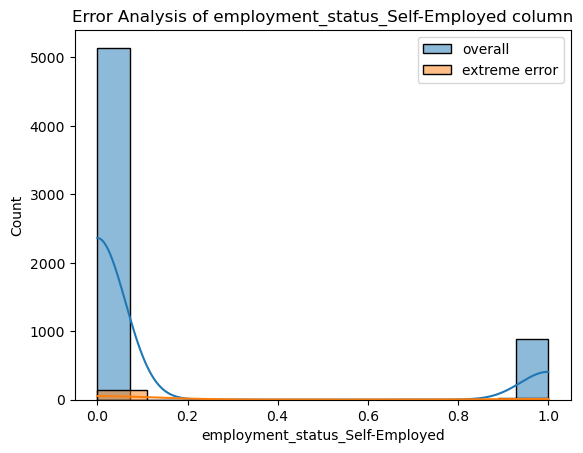

In [90]:
for i in X_test.columns:
    plt.title(f"Error Analysis of {i} column")

    sns.histplot(X_test[i],label='overall',kde=True)
    sns.histplot(extreme_error_df[i],label='extreme error',kde=True)
    plt.legend()
    plt.show()

#### so we can find there is a error is higher in Age column

<Axes: xlabel='age', ylabel='Count'>

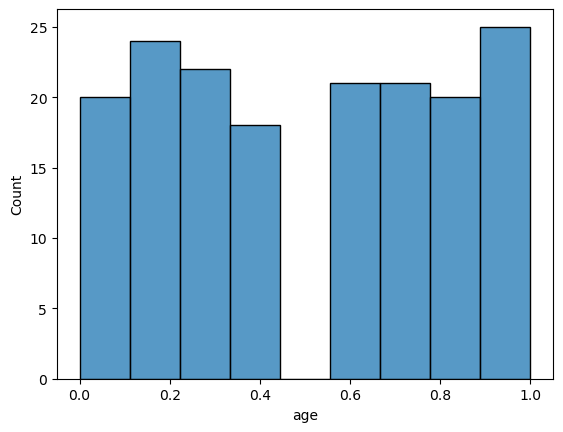

In [91]:
sns.histplot(extreme_error_df['age'])

In [92]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [93]:
extreme_error_df['income_level']=-1

In [94]:
extreme_error_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,income_level
13205,0.714286,0.333333,0.141414,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,1,0,1,-1
12669,0.857143,0.000000,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,1,0,-1
2918,0.285714,0.000000,0.151515,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,0,1,0,-1
1601,0.571429,0.000000,0.030303,0.0,0.0,1.0,1,1,0,0,1,0,1,0,1,0,0,0,-1
17084,1.000000,0.000000,0.353535,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0.000000,0.000000,0.040404,0.0,0.2,0.0,0,1,0,0,1,0,0,1,0,0,1,0,-1
8008,0.285714,0.000000,0.242424,0.0,0.2,0.0,1,1,0,0,1,0,1,0,0,0,0,0,-1
9714,0.142857,0.000000,0.313131,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,-1
11971,0.000000,0.000000,0.010101,0.0,0.2,0.0,1,0,0,1,1,0,0,0,0,0,0,0,-1


In [95]:
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scalar.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,23.0,1.0,-2.0,15.0,1.0,1.0
1,24.0,0.0,-2.0,1.0,1.0,0.0
2,20.0,0.0,-2.0,16.0,1.0,1.0
3,22.0,0.0,-2.0,4.0,1.0,0.0
4,25.0,0.0,-2.0,36.0,1.0,0.0
...,...,...,...,...,...,...
166,18.0,0.0,-2.0,5.0,1.0,1.0
167,20.0,0.0,-2.0,25.0,1.0,1.0
168,19.0,0.0,-2.0,32.0,1.0,0.0
169,18.0,0.0,-2.0,2.0,1.0,1.0


In [96]:
df_reversed.age.quantile(0.97)

25.0

# model Segmentation

#  Export The model

In [97]:
!pip install joblib



Defaulting to user installation because normal site-packages is not writeable


In [100]:
from joblib  import dump
dump(best_model,r"C:\Users\ankit\Python Project\Helth insurance project\app\artaffect\model_youngs.joblib")

scalar_with_cols={
    'scalar':scalar,
    'cols_to_scale':cols_to_scale
}
dump(scalar_with_cols,r"C:\Users\ankit\Python Project\Helth insurance project\app\artaffect\scalar_youngs.joblib")


['C:\\Users\\ankit\\Python Project\\Helth insurance project\\app\\artaffect\\scalar_youngs.joblib']

In [ ]:
scalar=MinMaxScaler()
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [101]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']